<a href="https://colab.research.google.com/github/l1f21bsee0018/DEEP-LEARNING/blob/main/oel1f21bsee0018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

**Set up Kaggle API**

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"jude69","key":"223f3ad8955f1642c880642c418a705e"}'}

**Install Kaggle library and set up API**

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


**Download the Heart Disease UCI dataset from Kaggle**

In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset
!unzip heart-disease-uci.zip


Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 11.5MB/s]
unzip:  cannot find or open heart-disease-uci.zip, heart-disease-uci.zip.zip or heart-disease-uci.zip.ZIP.


**Load and explore the dataset**

In [ ]:
data = pd.read_csv('/content/heart-disease-dataset.zip')
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   5

**Data Preprocessing**

In [ ]:
if data is not None:
    # Check for missing values
    print("\nMissing values:")
    print(data.isnull().sum())

    # Features and target
    X = data.drop('target', axis=1)
    y = data['target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Classifier Train the Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

**Make predictions and evaluate the model**

In [ ]:
# Training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Testing accuracy
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("\nTraining Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("\nClassification Report (Testing):")
    print(classification_report(y_test, y_test_pred))



Training Accuracy: 0.9536585365853658
Testing Accuracy: 0.8731707317073171

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       102
           1       0.83      0.94      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



**Visualize feature importance**

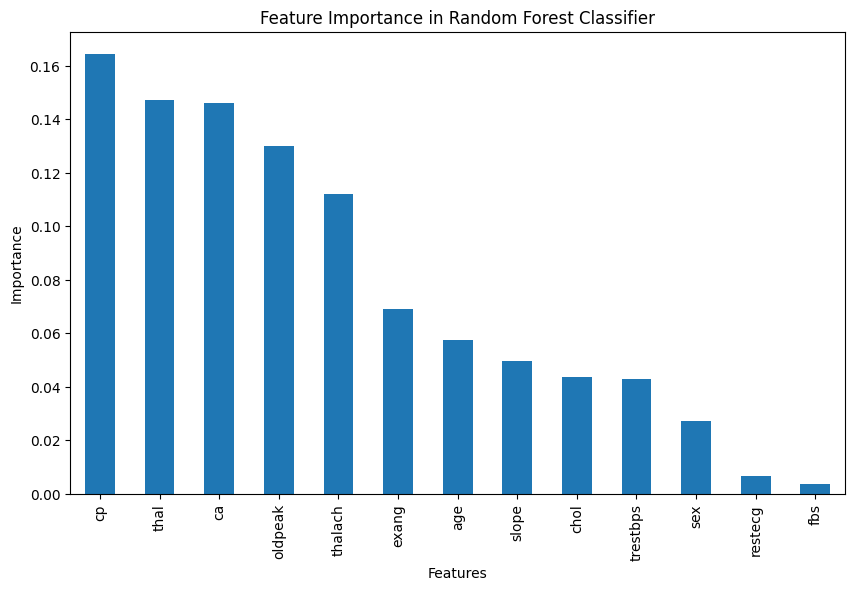

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Fine tuning**

In [ ]:
if train_accuracy < 0.8 or test_accuracy < 0.8:
    print("Tuning model to achieve at least 80% accuracy for both training and testing...")
    model = RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_split=5, random_state=42)
    model.fit(X_train_scaled, y_train)
    # Re-evaluate
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("\nTuned Training Accuracy:", train_accuracy)
    print("Tuned Testing Accuracy:", test_accuracy)
    print("\nTuned Classification Report (Testing):")
    print(classification_report(y_test, y_test_pred))